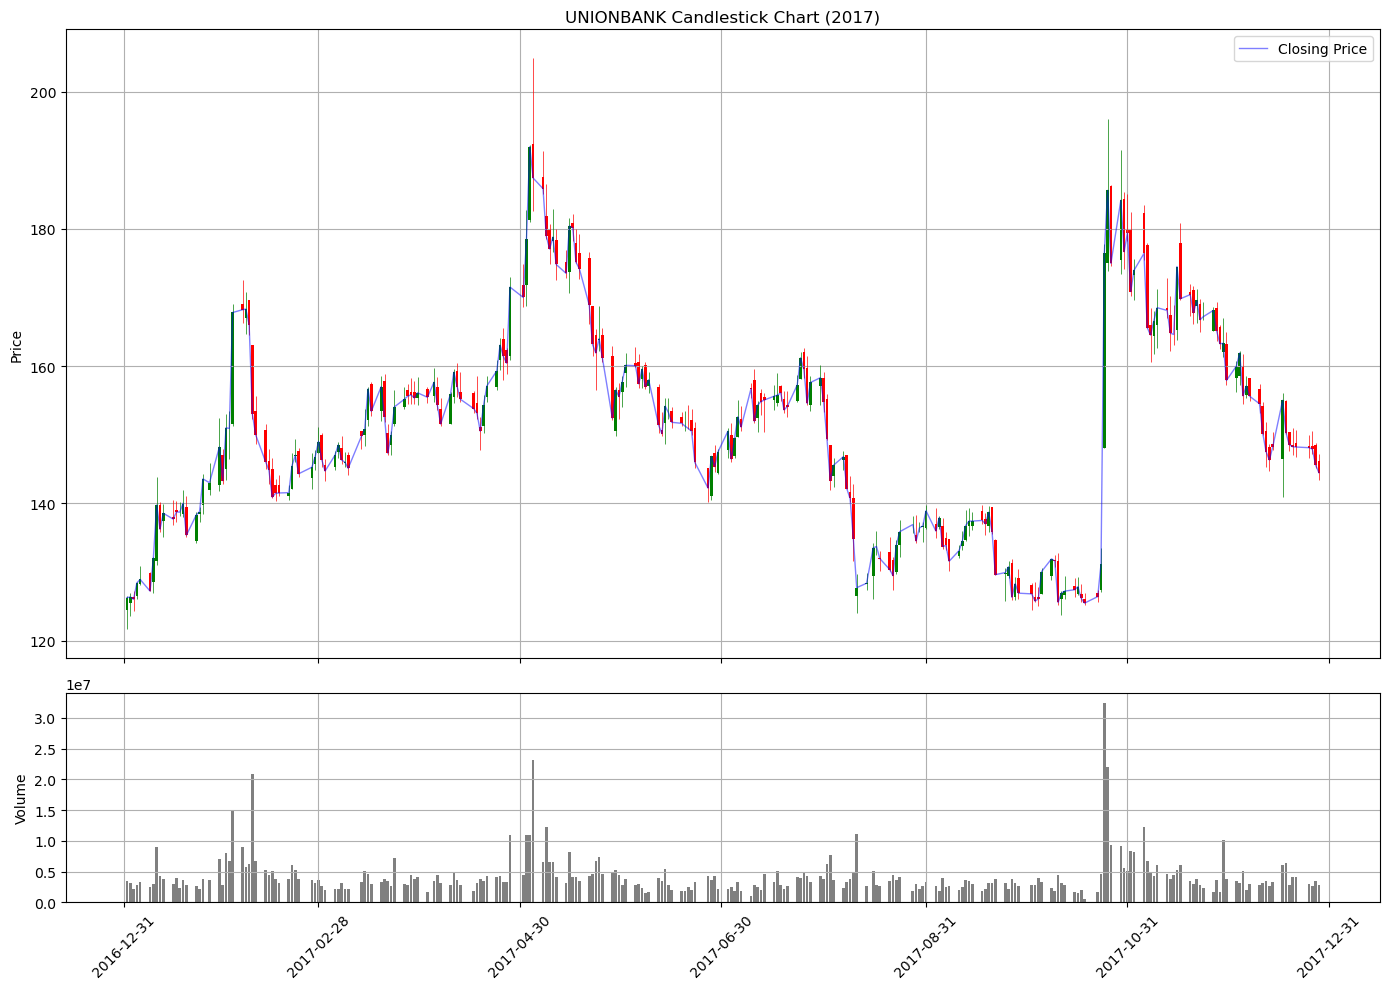

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

# Read the CSV file
df = pd.read_csv('UNIONBANK__EQ__NSE__NSE__MINUTE.csv')

# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Extract the first year of data
first_year = df[df.index.year == df.index.year.min()]

# Resample to daily data for better visualization
daily_data = first_year.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), 
                              gridspec_kw={'height_ratios': [3, 1]},
                              sharex=True)

# Plot candlesticks
for date, row in daily_data.iterrows():
    if row['close'] >= row['open']:
        color = 'green'  # Price increased
        bottom = row['open']
        height = row['close'] - row['open']
    else:
        color = 'red'  # Price decreased
        bottom = row['close']
        height = row['open'] - row['close']
    
    # Add candle body
    ax1.add_patch(Rectangle(
        (mdates.date2num(date) - 0.4, bottom),
        0.8, height,
        facecolor=color
    ))
    
    # Add wicks
    ax1.vlines(date, row['low'], row['high'], color=color, linewidth=0.5)

# Add closing price line
ax1.plot(daily_data.index, daily_data['close'], 
        'b-', alpha=0.5, linewidth=1, label='Closing Price')

# Formatting
ax1.set_title(f'UNIONBANK Candlestick Chart ({first_year.index.year.min()})')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot volume
ax2.bar(daily_data.index, daily_data['volume'], width=0.8, color='gray')
ax2.set_ylabel('Volume')
ax2.grid(True)

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()